In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('mymoviedb.csv',engine='python')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce') 
df['Vote_Count'] = df['Vote_Count'].astype('Int64')   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(1), float64(1), object(7)
memory usage: 701.4+ KB


In [7]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce') 
df['Vote_Average'] = df['Vote_Average'].astype(float)  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(1), float64(2), object(6)
memory usage: 701.4+ KB


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool

In [10]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.0,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.0,0.000000
25%,16.127500,146.0,5.900000
50%,21.191000,444.0,6.500000
75%,35.174500,1376.0,7.100000
max,5083.954000,31077.0,10.000000


In [11]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')  # change type
df['Release_Date'] = df['Release_Date'].dt.year.astype('Int64')  # only year 
print(df['Release_Date'].dtype)

Int64


#### dropping the columns

In [12]:
column=['Poster_Url','Original_Language','Overview']
df.drop(column, axis =1 ,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

#### give lables to vote average

In [13]:
def Catigories_column(df,column, label):
    edges= [
           df[column].describe()['min'],
          df[column].describe()['25%'],
        df[column].describe()['50%'],
        df[column].describe()['75%'],
         df[column].describe()['max'],
    ]
    df[column]=pd.cut(df[column],edges, labels=label,duplicates='drop')
    return df

In [14]:
lable=['Not_Popular','Below_Average','Average','Popular']
Catigories_column(df,'Vote_Average',lable)
df['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [16]:
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular      2467
Popular          2450
Average          2411
Below_Average    2398
Name: count, dtype: int64

In [17]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [18]:
# Step 1: Ensure Genre is string
df['Genre'] = df['Genre'].astype(str)

# Step 2: Split by comma
df['Genre'] = df['Genre'].str.split(',')

# Step 3: Explode into separate rows
df = df.explode('Genre').reset_index(drop=True)

# Step 4: Strip whitespace
df['Genre'] = df['Genre'].str.strip()

# Step 5: Convert to category
df['Genre'] = df['Genre'].astype('category')

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [20]:
df['Genre'].dtypes 

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [21]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

#### Data Visualization 

#### 1) What is the most frequent genre of movies re;eased on Netflix 

In [22]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

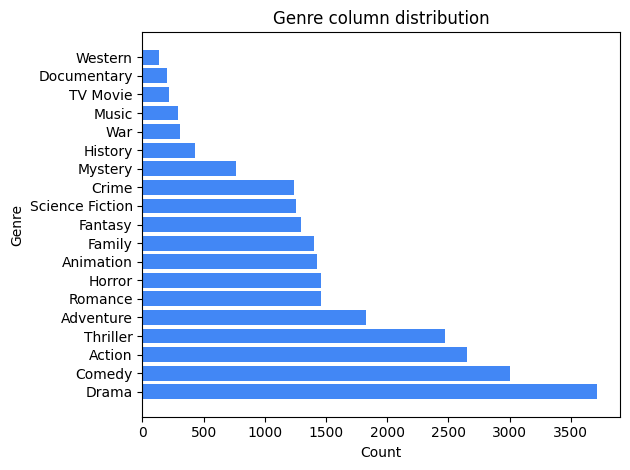

In [23]:

genre_counts = df['Genre'].value_counts()

plt.barh(genre_counts.index, genre_counts.values, color='#4287f5')
plt.title('Genre column distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#### 2) Which has higest votes in vote avg column

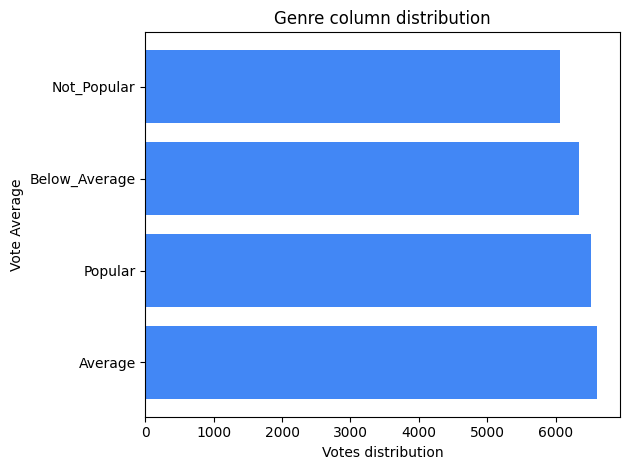

In [24]:
higest_votes=df['Vote_Average'].value_counts()
plt.barh(higest_votes.index, higest_votes.values, color='#4287f5')
plt.title('Genre column distribution')
plt.xlabel('Votes distribution')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()

##### 3) What movie got the higest popularity ? what's its genre ?

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [26]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


#### What movie got the lowest popularity ? What's its Genre ?

In [27]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25548,1984,Threads,13.354,186,Popular,War
25549,1984,Threads,13.354,186,Popular,Drama
25550,1984,Threads,13.354,186,Popular,Science Fiction


#### which year has the most filmmed movies ?

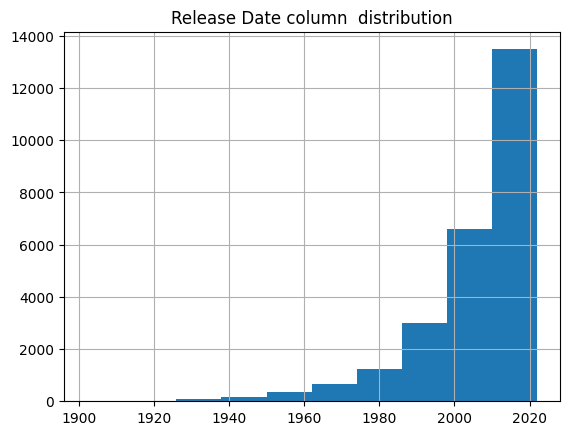

In [28]:
df['Release_Date'].hist()
plt.title('Release Date column  distribution')
plt.show()